# Testing GT catalogue load

Objectives:
    1. Test GT simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [1]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp']


## Display the environment

In [2]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [3]:
import nrcatalogtools

No version information file '.version' found


In [4]:
import nrcatalogtools.lvc as lalutils

In [5]:
from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax

In [6]:
import numpy as np
from nrcatalogtools.maya import MayaCatalog
import matplotlib.pyplot as plt


#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
#plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

In [7]:
#from nrcatalogtools.rit import RITCatalog

from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes

In [8]:

import sxs


In [9]:
# View SXS cache
sxs.sxs_directory("cache")

PosixPath('/home/vaishakprasad/.cache/sxs')

In [10]:
nrcatalogtools.__file__

'/home/vaishakprasad/Documents/Codes/nr-catalog-tools-vp/nrcatalogtools/__init__.py'

### MAYA cat details

In [11]:
nrcatalogtools.utils.maya_catalog_info

{'cache_dir': PosixPath('/home/vaishakprasad/.cache/MAYA'),
 'url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files',
 'metadata_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/catalog-table.txt',
 'data_dir': PosixPath('/home/vaishakprasad/.cache/MAYA/data'),
 'metadata_dir': PosixPath('/home/vaishakprasad/.cache/MAYA/metadata'),
 'data_url': 'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files'}

In [12]:
# Simulation name
sim_name = 'GT0001'

# Parameters
M = 40
D = 1000
inc = np.pi/3 #np.pi/3 - 0.0001
coa_phase = np.pi/6
delta_t = 1./2048

## Load waveform

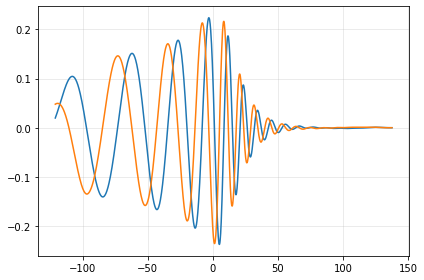

In [116]:
#sc = sxs.Catalog.load(download=True)
#rc = RITCatalog.load(verbosity=5, download=True)
mc = MayaCatalog.load(verbosity=5, download=True)

mwf = mc.get(sim_name)

theta = np.pi/8
phi = np.pi/6

h = mwf.evaluate([theta, phi])

hp1 = np.array(h).real
hx1 = np.array(h).imag

plt.plot(h.time, hp1)
plt.plot(h.time, hx1)
plt.grid()
plt.show()

# Waveformtools

In [106]:
import waveformtools

In [107]:
from importlib import reload
reload(waveformtools.transforms)

<module 'waveformtools.transforms' from '/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/transforms.py'>

In [108]:
from waveformtools.transforms import Yslm_pres, Yslm

In [117]:
h2 = np.zeros(h.time.shape)
ell_max = mwf.ell_max
for ell in range(2, ell_max+1):
        for emm in range(-ell, ell+1):
            print(ell, emm)
            Y = Yslm_pres(spin_weight=-2, ell=ell, emm=emm, theta=theta, phi=phi)
            
            Clm_re  = mwf.get_mode(ell, emm)[:, 1]
            Clm_im  = mwf.get_mode(ell, emm)[:, 2]
            
            Clm = Clm_re + 1j*Clm_im
            
            #print(type(Clm))
            h2 = h2 + Clm*np.complex256(np.conjugate(Y))
            #h2 = h2 + Clm*sp.conjugate(Y)

2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
6 -6
6 -5
6 -4
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6


In [114]:
ell = 23
emm = 2
theta=0.01
phi=0
Yslm_pres(spin_weight=2, ell=ell, emm=emm, theta=theta, phi=phi)

1.524829912178568e-5

In [115]:
Yslm(spin_weight=2, ell=ell, emm=emm, theta=theta, phi=phi)

(1.5248299121785653e-05+0j)

In [73]:
0.2069934248194/0.17877839004595

1.1578212823496068

In [74]:
0.2831486956194992/0.2445530238007915

1.1578212823495775

In [54]:
h2 = np.zeros(h.time.shape)
ell_max = mwf.ell_max
for ell in range(2, ell_max+1):
        for emm in range(-ell, ell+1):
            print(ell, emm)
            Y = Yslm_pres(spin_weight=-2, ell=ell, emm=emm, theta=theta, phi=phi)
            
            Clm_re  = mwf.get_mode(ell, emm)[:, 1]
            Clm_im  = mwf.get_mode(ell, emm)[:, 2]
            
            Clm = Clm_re + 1j*Clm_im
            
            #print(type(Clm))
            #h2 = h2 + Clm*np.complex256(np.conjugate(Y))
            h2 = h2 + Clm*np.conjugate(np.complex256(Y))

2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
6 -6
6 -5
6 -4
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6


In [118]:
h3 = np.zeros(h.time.shape)
ell_max = mwf.ell_max
for ell in range(2, ell_max+1):
        for emm in range(-ell, ell+1):
            print(ell, emm)
            Y = Yslm(spin_weight=-2, ell=ell, emm=emm, theta=theta, phi=phi)
            
            Clm_re  = mwf.get_mode(ell, emm)[:, 1]
            Clm_im  = mwf.get_mode(ell, emm)[:, 2]
            
            Clm = Clm_re + 1j*Clm_im
            
            #print(type(Clm))
            #h2 = h2 + Clm*np.complex256(np.conjugate(Y))
            h3 = h3 + Clm*np.conjugate(np.complex256(Y))

2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
6 -6
6 -5
6 -4
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6


In [56]:
np.finfo(np.complex256).precision

18

In [127]:
np.array(h)/h2

array([ 0.9992118 +0.27797128j,  1.0112098 +0.2313282j ,
        1.02102779+0.18414146j, ..., -0.84388282-0.49684215j,
       -0.84312026-0.48344891j, -0.68609932-0.75265171j])

/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


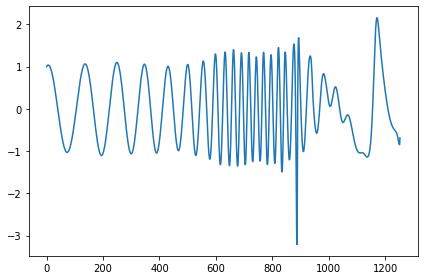

In [128]:
plt.plot(h/h2)
plt.show()

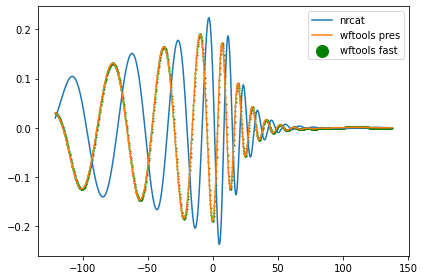

In [126]:
plt.plot(h.time, h.real, label='nrcat')
plt.plot(h.time, h2.real, label='wftools pres')
plt.scatter(h.time, h3.real, label='wftools fast', s=1, c='green')
plt.legend()
plt.show()

In [119]:
h

TimeSeries([1.97133733e-02+4.77750052e-02j, 2.11848484e-02+4.81343390e-02j,
       2.26853227e-02+4.84541623e-02j, ...,
       1.60885980e-06-5.45774586e-08j, 9.62835271e-07-4.44742151e-08j,
       3.11958091e-07-1.38867975e-09j], time=array([-121.10666667, -120.9       , -120.69333333, ...,  137.22666667,
        137.43333333,  137.64      ]), time_axis=0)

In [120]:
h2

array([ 3.06573876e-02+3.92840956e-02j,  3.02559494e-02+4.06792782e-02j,
        2.98073127e-02+4.20805394e-02j, ...,
       -1.38747254e-06+8.81558772e-07j, -8.36656940e-07+5.32492369e-07j,
       -2.05346681e-07+2.27289558e-07j])

In [121]:
h3

array([ 3.06573876e-02+3.92840956e-02j,  3.02559494e-02+4.06792782e-02j,
        2.98073127e-02+4.20805394e-02j, ...,
       -1.38747254e-06+8.81558772e-07j, -8.36656940e-07+5.32492369e-07j,
       -2.05346681e-07+2.27289558e-07j])

/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


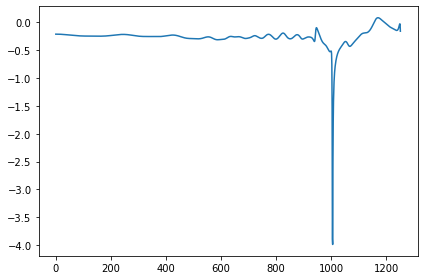

In [51]:
plt.plot(np.array(h2)/np.array(h))
plt.show()

In [47]:
np.amax(np.array(h) - h2)

(0.37088417732957346-0.03352715670694703j)

In [21]:
import sympy as sp

In [ ]:
sp.conjugate

In [19]:
h2

array([ 2.06205846e-02+2.39060626e-03j,  2.06279019e-02+2.46218734e-03j,
        2.06135058e-02+2.53386725e-03j, ...,
       -5.91312471e-09-4.96011473e-08j, -4.15441145e-09-2.87945935e-08j,
       -4.56716329e-08-9.39024996e-10j])

In [20]:
h

TimeSeries([1.71734006e-02+9.08157279e-04j, 1.79199895e-02+9.79783694e-04j,
       1.86725194e-02+1.05285826e-03j, ...,
       8.93488239e-07+2.28235609e-08j, 5.40351422e-07+1.27519655e-08j,
       1.48461063e-07-4.30642158e-09j], time=array([-121.10666667, -120.9       , -120.69333333, ...,  137.22666667,
        137.43333333,  137.64      ]), time_axis=0)

In [17]:
dreal = h.real/h2.real -1
dimag = h.imag/h2.imag - 1

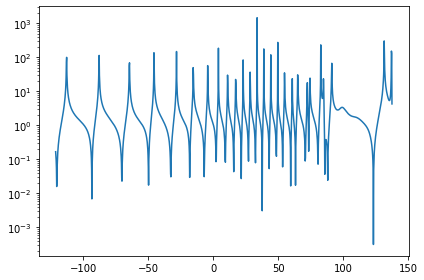

In [18]:
fig, ax = plt.subplots()
ax.set_yscale('log')

ax.plot(h.time, np.absolute(dreal))
plt.show()

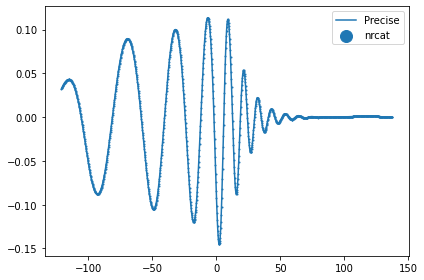

In [61]:
plt.plot(h.time, h2_re, label='Precise')
plt.scatter(h.time, h.real, label='nrcat', s=1, c= )
plt.legend()
plt.show()

# Method II :

Using [the script](https://github.com/cevans216/gt-waveform-catalog/tree/master/scripts)

In [18]:
import lal

In [19]:
# Lal path
lal.__file__

'/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/lal/__init__.py'

## Original script, no changes

import h5py
import lal
import lalsimulation as lalsim
from pycbc import pnutils
from matplotlib import pyplot
import numpy

file = f'{fdir}/data/GT0001.h5'

f = h5py.File(file, 'r')

params = {}

# Extrinsic parameters:

params['f_lower'] = 20.0
params['mtotal'] = 150.0
params['inclination'] = 0.0
params['distance'] = 100.0

# Metadata parameters:

params['eta'] = f.attrs['eta']

params['mass1'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[0]
params['mass2'] = pnutils.mtotal_eta_to_mass1_mass2(params['mtotal'], params['eta'])[1]

params['spin1x'] = f.attrs['spin1x']
params['spin1y'] = f.attrs['spin1y']
params['spin1z'] = f.attrs['spin1z']
params['spin2x'] = f.attrs['spin2x']
params['spin2y'] = f.attrs['spin2y']
params['spin2z'] = f.attrs['spin2z']


params['coa_phase'] = f.attrs['coa_phase']

    
f.close()

#
dt = 1.0/4096.0

from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant='NR_hdf5',
                         numrel_data=file,
                         mass1=params['mass1'],
                         mass2=params['mass2'],
			 spin1x=params['spin1x'],
			 spin1y=params['spin1y'],
                         spin1z=params['spin1z'],
			 spin2x=params['spin2x'],
                         spin2y=params['spin2y'],
			 spin2z=params['spin2z'],
                         delta_t=dt,
                         f_lower=30.0,
                         inclination=params['inclination'],
                         coa_phase=params['coa_phase'],
                         distance=params['distance'])

#
t = numpy.array(range( len(hp) ) )*dt
pyplot.figure()
pyplot.plot( t, hp, color=[0,0.7071,1] )
pyplot.show()


Here, `coa_phase` is missing from h5 file's attributes. Correcting for this and loading the same simulation as in the catalogue load, 

In [68]:
import unittest


class TestEvaluate(unittest.TestCase):
    ''' Test loading of MAYA waveforms '''
    
    def test_waveforms(self):
        ''' Test the MAYA loading of waveforms against 
        that loading using lalsimulation. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        wf1 = np.array(wf1_p) + 1j*np.array(wf1_x)
        wf2 = np.array(wf2_p) + 1j*np.array(wf2_x)
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0")
        
        prec = 0
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 100%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be atmost 100%")
        self.assertAlmostEqual(np.absolute(Amin_x), 0, prec, f"The maximum lower deviation between the x components of the waveforms must be atmost 100%")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be atmost 100%0")
        self.assertAlmostEqual(np.absolute(Amax_x), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be atmost 100%0")
        
        prec = 0
        # Mismatch should be less than 1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0")

        prec = 1
        # Full array
        np.testing.assert_almost_equal(wf1, wf2, prec, f'Array elements must be equal to at least 1 decimal')
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_waveforms (__main__.TestMaya)
Test the MAYA loading of waveforms against ... ok

----------------------------------------------------------------------
Ran 1 test in 0.066s

OK
